In [1]:
import pandas
import aql
conn = aql.Connection("http://arachne.compbio.ohsu.edu")
O = conn.graph("bmeg")

In [7]:
q = O.query().V().where(aql.eq("$.label", "Individual"))
#q = q.where(aql.and_(aql.eq("source", "tcga"), aql.eq("disease_code", "KIRC")))
q = q.where(aql.and_(aql.eq("source", "tcga"), aql.eq("vital_status", "Dead")))


for row in q:
    #for k in row['vertex']['data']:
    #    if 'day' in k:
    #        a.add( k )
    status = row['vertex']['data'].get('vital_status', None)
    last = row['vertex']['data'].get('last_contact_days_to', None)
    initial = row['vertex']['data'].get('initial_pathologic_dx_days_to', None)
    death = row['vertex']['data'].get('death_days_to', None)
    alive = row['vertex']['data'].get('days_to_last_known_alive', None)
    if status == "Dead":
        print status, initial, last, death, alive
    #print row['vertex']['data']

In [2]:
a = [100, 150, 155, 180, 190, 300, 350]

In [3]:
%matplotlib inline

In [4]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

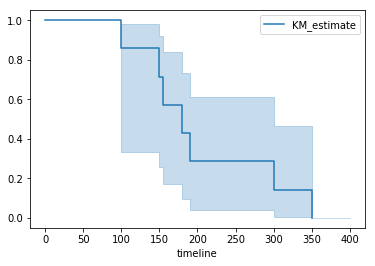

In [5]:
kmf.fit(a)
kmf.plot()
